In [193]:
# # importing required libraries
# import os
# from os.path import join
# import io
# import sys
# from PIL import Image, ImageDraw
# import numpy as np
# import matplotlib.pyplot as plt
# import cv2
# from enum import Enum
# from google.cloud import vision

# from BS_AlignForm import align, cropped_from_aligned

(2200, 1700)


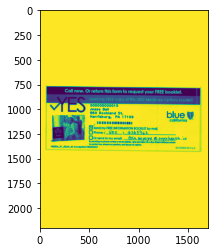

In [194]:
# setting up required path for image
file_name = "15.png"
folder_path = r'C:\Users\Krishna Sahoo\Documents\Python Venv\BlueShield\BS_Demo\filled_forms'
image_file = os.path.join(folder_path, file_name)
img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img)

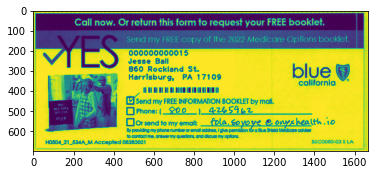

In [195]:
# Align the source images with template
temp_folder = r'C:\Users\Krishna Sahoo\Documents\Python Venv\BlueShield\BS_Demo\temp'
template_file = join(r'C:\Users\Krishna Sahoo\Documents\Python Venv\BlueShield\BS_Demo\onboarding\BRC_Template1', 
                'brc_template.png')
template = cv2.imread(template_file, 1)
matrix = align(template, img)
res = cv2.warpPerspective(img, matrix, (template.shape[1], template.shape[0]))
plt.imshow(res)

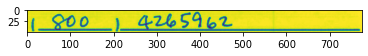

In [196]:
phone_pos = {'hs':470, 'he':520, 'ws':620, 'we':1395}
phone_img = res[phone_pos['hs']:phone_pos['he'], phone_pos['ws']:phone_pos['we']]
plt.imshow(phone_img)

In [197]:
count = 4
max_pct = 500
padding = 100
min_pct = 200
ph = phone_pos['he']-phone_pos['hs']
pw = phone_pos['we']-phone_pos['ws']
canvas_h = count*max_pct*0.01*(ph)+padding*(count-1)
canvas_h = int(canvas_h)
print(canvas_h)
canvas_w = max_pct*0.01*(pw)
canvas_w = int(canvas_w)
print(canvas_w)

1300
3875


In [198]:
canvas = np.full((canvas_h, canvas_w),255, dtype=np.uint8)
steps = list(np.linspace(min_pct, max_pct, count))
print(steps)

[200.0, 300.0, 400.0, 500.0]


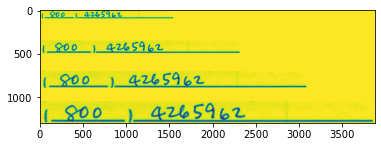

In [199]:
for i, pct in enumerate(steps):
    img_resize = cv2.resize(phone_img, None, fx=pct*0.01, fy=pct*0.01)
    offset = int(i*(ph*max_pct*0.01 + padding))
    hs = offset
    he = offset + img_resize.shape[0]
    ws = 0
    we = img_resize.shape[1]
    canvas[hs:he, ws:we] = img_resize
plt.imshow(canvas)

In [200]:
cv2.imwrite(join(r'C:\Users\Krishna Sahoo\Documents\Python Venv\BlueShield\BS_Demo\resize_prototyping','phone_15.png'),canvas)

True

In [201]:
image_file = join(r'C:\Users\Krishna Sahoo\Documents\Python Venv\BlueShield\BS_Demo\resize_prototyping','phone_15.png')

In [202]:
# Calling the API

# calling up google vision json file
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'ServiceAccountToken.json'

# initiate a client
client = vision.ImageAnnotatorClient()

# load image into memory
with io.open(image_file, 'rb') as image_file1:
    file_content = image_file1.read()

# perform text detection from the image
image_detail = vision.Image(content=file_content)
response = client.document_text_detection(image=image_detail, image_context={"language_hints": ["en"]})
document = response.full_text_annotation

In [203]:
# print text from the document
doctext = response.full_text_annotation.text
print(doctext)

800 / 4265962
1800 4265962
1800 / 4265962
800
14265962



In [204]:
# # print text from the document
# doctext = response.full_text_annotation.text
# print(doctext)

In [205]:
# review the confidence of text extraction
pages = response.full_text_annotation.pages
for page in pages:
    for block in page.blocks:
        print('\nBlock confidence: {}\n'.format(block.confidence))

        for paragraph in block.paragraphs:
            print('Paragraph confidence:', paragraph.confidence)

            for word in paragraph.words:
                word_text = ''.join([symbol.text for symbol in word.symbols])
                print('Word_text: {0} , (confidence: {1})'.format(word_text, word.confidence))

                for symbol in word.symbols:
                    print('\tSymbol: {} (confidence: {})'.format(symbol.text, symbol.confidence))


Block confidence: 0.8999999761581421

Paragraph confidence: 0.8999999761581421
Word_text: 800 , (confidence: 0.949999988079071)
	Symbol: 8 (confidence: 0.9900000095367432)
	Symbol: 0 (confidence: 0.9300000071525574)
	Symbol: 0 (confidence: 0.9399999976158142)
Word_text: / , (confidence: 0.44999998807907104)
	Symbol: / (confidence: 0.44999998807907104)
Word_text: 4265962 , (confidence: 0.9399999976158142)
	Symbol: 4 (confidence: 0.9300000071525574)
	Symbol: 2 (confidence: 0.949999988079071)
	Symbol: 6 (confidence: 0.9800000190734863)
	Symbol: 5 (confidence: 0.9599999785423279)
	Symbol: 9 (confidence: 0.9599999785423279)
	Symbol: 6 (confidence: 0.9900000095367432)
	Symbol: 2 (confidence: 0.8600000143051147)

Block confidence: 0.9200000166893005

Paragraph confidence: 0.9200000166893005
Word_text: 1800 , (confidence: 0.8399999737739563)
	Symbol: 1 (confidence: 0.9399999976158142)
	Symbol: 8 (confidence: 1.0)
	Symbol: 0 (confidence: 0.6499999761581421)
	Symbol: 0 (confidence: 0.7699999809